# Rescomp Data Analysis

In [41]:
import rescomp as rc
import numpy as np
from scipy.interpolate import CubicSpline
from scipy import integrate, sparse
from scipy.stats import pearsonr
from scipy.sparse.linalg import eigs, ArpackNoConvergence
from scipy.sparse import coo_matrix
import math 
import networkx as nx
import itertools
import csv
import time
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 5]
# Set seed for reproducibility
np.random.seed(1)
from math import comb
import h5py
from mpi4py import MPI
from glob import glob
from matplotlib import pyplot as plt
import matplotlib

In [42]:
results_path = '/home/seyfdall/compute/network_theory/thinned_rescomp/results_old/'

In [43]:
def get_file_data(hdf5_file='results/erdos_results_0.h5'):
    """
    
    """

    with h5py.File(hdf5_file, 'r') as file:
        vpt_thinned_list = []
        div_new_thinned_list = []
        div_old_thinned_list = []
        consistency_thinned_list = []

        for group_name in file.keys():
            group = file[group_name]
            vpt_thinned_list.append(group.attrs['mean_vpt_thinned'])
            div_new_thinned_list.append(group.attrs['div_new_thinned'])
            div_old_thinned_list.append(group.attrs['div_old_thinned'])
            consistency_thinned_list.append(group.attrs['mean_consistency_thinned'])
            # print('{}, c: {}, vpt_connected: {}, p_thin: {}, vpt_thinned: {}'.format(group_name, c, vpt_connected, p_thin, vpt_thinned))
        # print('vpt_connected_average: {}, vpt_thinned_average: {}'.format(np.mean(vpt_connected_list), np.mean(vpt_thinned_list)))
        
        mean_vpt = np.mean(vpt_thinned_list)
        mean_div_new = np.mean(div_new_thinned_list)
        mean_div_old = np.mean(div_old_thinned_list)
        mean_consistency = np.mean(consistency_thinned_list)
        
        return mean_vpt, mean_div_new, mean_div_old, mean_consistency

In [44]:
def get_system_data(p_thins, rhos, results_path=results_path):
    """
    
    """
    mean_vpts = np.zeros((len(rhos), len(p_thins)))
    mean_new_divs = np.zeros((len(rhos), len(p_thins)))
    mean_old_divs = np.zeros((len(rhos), len(p_thins)))
    mean_consistencies = np.zeros((len(rhos), len(p_thins)))

    for i, rho in enumerate(rhos):
        for j, p_thin in enumerate(p_thins):
            hdf5_file = results_path + f"erdos_results_rho={round(rho,2)}_p_thin={round(p_thin,2)}.h5"
            mean_vpts[i,j], mean_new_divs[i,j], mean_old_divs[i,j], mean_consistencies[i,j] = get_file_data(hdf5_file=hdf5_file)

    return mean_vpts, mean_new_divs, mean_old_divs, mean_consistencies

In [45]:
def create_system_plot(values, ax, title):
    """
    
    """
    p_thins = np.concatenate((np.arange(0, 0.8, 0.1), np.arange(0.8, 1.01, 0.02)))
    rhos = [0.1,0.9,1.0,1.1,2.0,5.0,10.0,25.0,50.0]

    cmap = 'viridis'
    norm = matplotlib.colors.Normalize(vmin=0, vmax=np.max(values[np.isfinite(values)]))
    sm = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

    X, Y = np.meshgrid(p_thins, rhos)
    ax.pcolormesh(X, Y, values, shading='nearest', norm=norm, cmap=cmap)
    
    ax.set_title(title)
    ax.set_xlabel('p_thin')
    ax.set_ylabel('rho')
    
    plt.colorbar(mappable=sm, ax=ax)

In [46]:
def create_plots():
    fig, axs = plt.subplots(1,4, figsize=(14,3.2))
    p_thins = np.concatenate((np.arange(0, 0.8, 0.1), np.arange(0.8, 1.01, 0.02)))
    rhos = [0.1,0.9,1.0,1.1,2.0,5.0,10.0,25.0,50.0]
    
    mean_values = get_system_data(p_thins, rhos, results_path=results_path)
    titles = ['VPT', 'New Div', 'Old Div', 'Consistency']

    for i in range(len(mean_values)):
        create_system_plot(mean_values[i], axs[i], titles[i])
    plt.tight_layout()
    plt.show()

### Analysis on c=4

In [47]:
results_1_path = results_path + 'erdos_results_rho=10.0_p_thin=0.1.h5'
get_file_data(hdf5_file=results_1_path)

(0.0, 0.07061342676181895, 0.0027857378643319115, 0.9919573594607811)

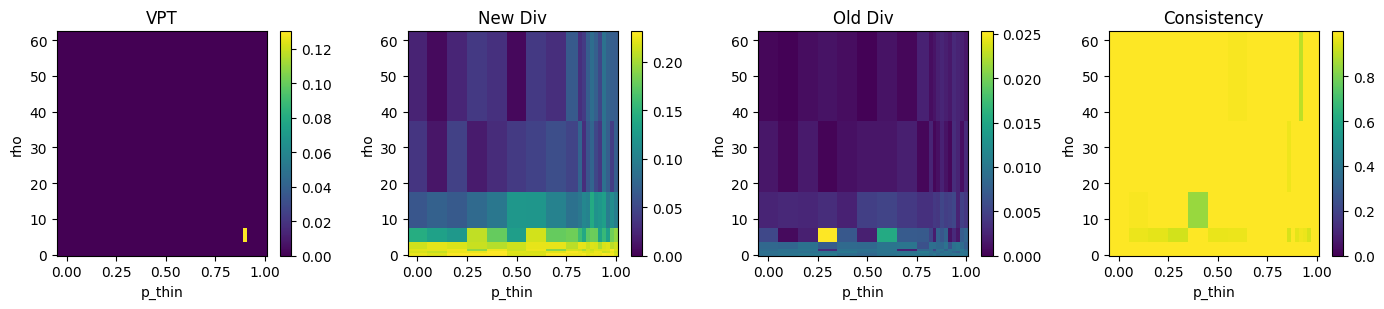

In [48]:
create_plots()